In [15]:
import warnings
warnings.filterwarnings('ignore')

###Задание 1


In [16]:
'Импортируйте библиотеки pandas, numpy и matplotlib.'
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [17]:
'Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.'
from sklearn.datasets import load_boston

In [18]:
'Создайте датафреймы X и y из этих данных.'
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [19]:
'''
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, 
чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
'Масштабируйте данные с помощью StandardScaler.'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [21]:
'Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.'
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

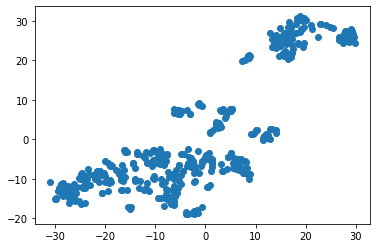

In [22]:
'Постройте диаграмму рассеяния на этих данных.'
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

###Задание 2

In [23]:
'''
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
'''
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter = 100, random_state=42)
train_labels = model.fit_predict(X_train)

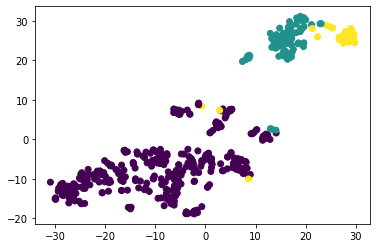

In [24]:
'Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE и раскрасьте точки из разных кластеров разными цветами.'
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

In [25]:
'Вычислите средние значения price и CRIM в разных кластерах.'
result = pd.DataFrame([[y_train[train_labels == i].mean(), X_train.loc[train_labels == i, 'CRIM'].mean()] for i in range(len(set(train_labels)))],
                      index = ['Кластер 1', 'Кластер 2', 'Кластер 3'],
                      columns = ['Средняя цена', 'Средний уровень преступности'])
result

Средняя цена  Средний уровень преступности
Кластер 1     25.168687                      0.404863
Кластер 2     17.442105                     11.745662
Кластер 3     13.196774                     14.360380

###Задание 3

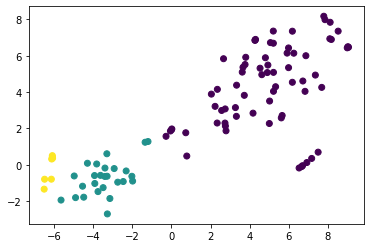

In [28]:
'Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.'
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_scaled)
test_labels = model.fit_predict(X_test)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.show()

In [27]:
'Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.'
new_result = pd.DataFrame([[y_test[test_labels == i].mean(), X_test.loc[test_labels == i, 'CRIM'].mean()] for i in range(len(set(test_labels)))],
                      index = ['Кластер 1', 'Кластер 2', 'Кластер 3'],
                      columns = ['Средняя цена', 'Средний уровень преступности'])
new_result

Средняя цена  Средний уровень преступности
Кластер 1     23.911594                      0.246421
Кластер 2     17.392308                      8.469302
Кластер 3     12.814286                     19.021666